In [1]:
import sys
sys.path.append('../utils/')

from utils import *
from TableMapper import TableMapper

from tqdm.notebook import tqdm
tqdm.pandas()

In [2]:
query, schema = get_spider_schema_table_files()
tableMapper = TableMapper(query, schema)

In [3]:
res = []
count1 = 0
count2 = 0
for i in tqdm(list(set(schema.schema_id.values))):
    s, t = tableMapper.get_filtered_schema(i)
    count_match, count_all = tableMapper.get_exact_match_accuracy(s, t)

    count1 += count_match
    count2 += count_all

    if(count1 == 0):
        print(i)

    res.append([i, count_match/count_all, len(s), len(t)])

  0%|          | 0/166 [00:00<?, ?it/s]

In [6]:
test_schema = 'small_bank_1'
s, t = tableMapper.get_filtered_schema(test_schema)

count_match, count_all = tableMapper.get_exact_match_accuracy(s, t)
print(count_match / count_all)
# print(tableMapper.get_exact_match_accuracy(t, s, verbosity=1))

0.2


0.6289301004020899
0.5380485286525555


,schema_id,score,num_tables,num_queries
0,scholar,0.014060,10,569
1,yelp,0.144144,7,111
2,restaurants,0.152000,3,125
3,academic,0.171271,15,181
4,small_bank_1,0.200000,3,50
5,hospital_1,0.220000,15,100
6,local_govt_and_lot,0.235294,11,17
7,student_assessment,0.245283,9,53
8,imdb,0.247706,16,109
9,real_estate_properties,0.250000,5,4


<AxesSubplot:>

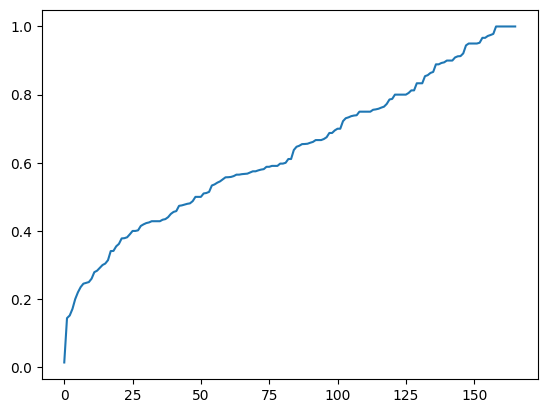

In [5]:
score_df = pd.DataFrame(res, columns = ['schema_id', 'score', 'num_tables', 'num_queries']).sort_values(by = 'score').reset_index(drop = True)
print(score_df.score.mean())
print(count1 / count2)
display(score_df.head(10))
score_df.score.plot()

In [6]:
print(count1)
print(count2)

# 5194
# 9685

# 5223
# 9685

5216
9685
